In [ ]:
pip install pandas numpy matplotlib seaborn pytrends


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import time  # Importar el módulo time

In [3]:
pytrends = TrendReq(hl='es-MX', tz=360)

In [20]:
productos_especializados = {
    "Ropa y Accesorios de Moda": ["moda femenina", "ropa de marca", "ropa casual"],
    "Zapatos": ["zapatos de mujer", "zapatos de hombre", "calzado casual"],
    "Joyería y Relojes": ["joyería fina", "relojes de lujo", "collares de oro"],
    "Ropa Infantil": ["ropa para niños", "ropa para bebés", "moda infantil"],
    "Artículos Deportivos": ["ropa deportiva", "accesorios deportivos", "tenis deportivos"],
    "Productos de Belleza y Cuidado Personal": ["maquillaje", "cuidado de la piel", "productos de belleza"],
    "Artículos para Mascotas": ["comida para perros", "juguetes para mascotas", "accesorios para mascotas"],
    "Libros y Papelería": ["librerías", "material de oficina", "libros de texto"],
    "Juguetes y Accesorios para Niños": ["juguetes para niños", "juguetes educativos", "accesorios para bebés"],
    "Muebles y Decoración del Hogar": ["muebles para el hogar", "decoración de interiores", "muebles modernos"],
    "Pinturas y Productos para el Hogar": ["pinturas para interiores", "herramientas de pintura", "decoración de paredes"],
    "Equipamiento de Oficina": ["escritorios de oficina", "sillas ergonómicas", "muebles de oficina"],
    "Electrónica y Tecnología": ["electrodomésticos", "computadoras", "tabletas electrónicas"],
    "Vinos y Licores": ["vino tinto", "vino blanco", "licores importados"],
    "Dulces y Snacks": ["dulces mexicanos", "snacks saludables", "botanas"],
    "Productos de Salud y Farmacia": ["medicamentos", "vitaminas", "suplementos alimenticios"],
    "Equipaje y Maletas": ["maletas de viaje", "mochilas", "equipaje de mano"],
    "Productos de Nutrición y Alimentos Saludables": ["alimentos orgánicos", "productos sin gluten", "proteínas en polvo"],
    "Refacciones Automotrices": ["piezas para autos", "aceite para motor", "neumáticos"],
    "Moda Íntima": ["lencería", "ropa interior femenina", "ropa interior masculina"]
}

# Descripción de las Categorías Ajustadas

- **Ropa y Accesorios de Moda**: Para tiendas como Zara, Levi's, Sfera, Shasa, Julio, Aerie y American Eagle.
- **Zapatos**: Productos para tiendas como Flexi y Dorothy Gaynor.
- **Joyería y Relojes**: Para tiendas como Bizzarro y Ben & Frank.
- **Ropa Infantil**: Productos en tiendas como Carter’s y OshKosh.
- **Artículos Deportivos**: Productos para tiendas como Martí y SX.
- **Productos de Belleza y Cuidado Personal**: Sally Beauty y LUX.
- **Artículos para Mascotas**: Productos para tiendas como Petco.
- **Libros y Papelería**: Productos en Office Depot y OfficeMax.
- **Juguetes y Accesorios para Niños**: Productos que se pueden encontrar en tiendas como TodoModa.
- **Muebles y Decoración del Hogar**: Categoría para Office Depot y OfficeMax.
- **Pinturas y Productos para el Hogar**: Productos para tiendas como Comex.
- **Equipamiento de Oficina**: Artículos que se venden en Office Depot, OfficeMax y Ofix.
- **Electrónica y Tecnología**: Productos de Steren y Office Depot.
- **Vinos y Licores**: Categoría de La Europea.
- **Dulces y Snacks**: Productos de Dulcería El PÉNIX y Nutrisa.
- **Productos de Salud y Farmacia**: Productos de Farmacias del Ahorro, Farmacias Benavides y Farmacia San Pablo.
- **Equipaje y Maletas**: Productos de Samsonite.
- **Productos de Nutrición y Alimentos Saludables**: Productos de Super Naturista y Nutrisa.
- **Refacciones Automotrices**: Productos para AutoZone.
- **Moda Íntima**: Productos de Vicky Form.


In [21]:
#Función para Dividir la Lista en Grupos de 5 (Limitación de Google Trends)
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))


In [22]:
# Recopilación de datos
all_trends_data = pd.DataFrame()


# Obtener datos para cada grupo de palabras clave
for category, keywords in productos_especializados.items():
    # Dividir en grupos de 3 y hacer una solicitud para cada grupo
    pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='MX', gprop='')
    trends_data = pytrends.interest_over_time()
    
    if 'isPartial' in trends_data.columns:
        trends_data = trends_data.drop(columns=['isPartial'])
    

    trends_data[category] = trends_data[keywords].mean(axis=1) # Calcular el promedio para la categoría
    
    # Añadir la columna de la categoría al DataFrame final y mantener solo la columna de promedio
    all_trends_data = pd.concat([all_trends_data, trends_data[[category]]], axis=1)
    
    time.sleep(5)     # Pausa para evitar límites de frecuencia

# Llenar valores nulos con 0 en el DataFrame final
all_trends_data.fillna(0, inplace=True)
all_trends_data

,Ropa y Accesorios de Moda,Zapatos,Joyería y Relojes,Ropa Infantil,Artículos Deportivos,Productos de Belleza y Cuidado Personal,Artículos para Mascotas,Libros y Papelería,Juguetes y Accesorios para Niños,Muebles y Decoración del Hogar,Pinturas y Productos para el Hogar,Equipamiento de Oficina,Electrónica y Tecnología,Vinos y Licores,Dulces y Snacks,Productos de Salud y Farmacia,Equipaje y Maletas,Productos de Nutrición y Alimentos Saludables,Refacciones Automotrices,Moda Íntima
date,,,,,,,,,,,,,,,,,,,,
2023-10-29,32.000000,43.333333,27.666667,25.666667,31.666667,33.333333,24.333333,23.666667,8.000000,27.333333,15.333333,31.666667,22.333333,11.666667,38.000000,52.000000,11.000000,0.000000,37.666667,27.333333
2023-11-05,33.000000,48.000000,21.333333,30.000000,41.000000,3.333333,33.333333,36.333333,12.000000,35.666667,38.666667,28.333333,28.666667,13.333333,32.333333,64.333333,12.666667,33.333333,37.666667,26.000000
2023-11-12,34.333333,53.000000,23.666667,34.333333,43.666667,3.000000,29.666667,30.333333,14.000000,43.666667,27.666667,35.666667,27.333333,15.666667,35.000000,60.666667,14.666667,0.000000,35.666667,26.666667
2023-11-19,33.000000,57.333333,0.000000,30.333333,38.333333,3.000000,31.666667,31.000000,15.333333,40.333333,39.666667,30.333333,23.333333,15.666667,35.666667,54.333333,13.666667,0.000000,33.666667,25.666667
2023-11-26,34.000000,50.666667,22.666667,31.666667,33.666667,2.666667,27.000000,31.000000,16.333333,32.666667,33.333333,23.666667,23.000000,16.666667,38.000000,60.333333,13.333333,0.000000,34.666667,26.000000
2023-12-03,34.666667,55.000000,0.000000,37.666667,37.666667,3.000000,26.666667,23.666667,20.000000,34.333333,35.666667,25.666667,19.666667,20.000000,43.000000,54.666667,13.666667,21.666667,35.666667,25.666667
2023-12-10,37.333333,58.000000,31.000000,31.666667,37.000000,3.666667,26.000000,16.666667,23.666667,31.333333,29.000000,25.666667,16.333333,25.333333,38.333333,49.333333,13.666667,0.000000,36.000000,25.666667
2023-12-17,39.000000,57.666667,0.000000,26.333333,40.666667,3.333333,27.000000,10.666667,29.000000,23.000000,27.000000,24.000000,13.000000,43.000000,42.666667,48.333333,15.333333,0.000000,37.333333,30.666667
2023-12-24,38.666667,52.333333,29.333333,17.000000,39.666667,3.333333,31.333333,7.666667,23.000000,33.000000,27.666667,16.000000,12.666667,43.333333,37.333333,47.666667,15.000000,0.000000,38.333333,34.000000


Los valores que aparecen en cada categoría de la tabla representan el **nivel de interés de búsqueda** en Google Trends para cada producto específico en una fecha determinada. Google Trends escala estos valores de **0 a 100** para mostrar la popularidad relativa del término de búsqueda en el tiempo:

- **0** indica que el interés de búsqueda es muy bajo o nulo para esa fecha.
- **100** representa el pico de interés de búsqueda en el período analizado.


# Resumen Estadístico del Interés de Búsqueda por Categoría

In [24]:
summary_stats = all_trends_data.describe()
summary_stats


,Ropa y Accesorios de Moda,Zapatos,Joyería y Relojes,Ropa Infantil,Artículos Deportivos,Productos de Belleza y Cuidado Personal,Artículos para Mascotas,Libros y Papelería,Juguetes y Accesorios para Niños,Muebles y Decoración del Hogar,Pinturas y Productos para el Hogar,Equipamiento de Oficina,Electrónica y Tecnología,Vinos y Licores,Dulces y Snacks,Productos de Salud y Farmacia,Equipaje y Maletas,Productos de Nutrición y Alimentos Saludables,Refacciones Automotrices,Moda Íntima
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,28.257862,39.157233,10.364780,20.207547,38.628931,2.981132,25.201258,20.559748,7.729560,25.320755,14.427673,29.113208,21.037736,13.584906,34.295597,53.163522,15.861635,7.025157,35.037736,27.308176
std,3.767632,7.333218,14.473563,6.216268,3.439750,4.445979,4.217049,7.444316,6.689083,6.826908,10.164959,6.548942,6.177108,6.973670,4.177504,4.973272,7.174693,11.023450,2.206885,2.066056
min,22.333333,30.666667,0.000000,11.333333,31.666667,1.333333,17.000000,7.666667,3.333333,10.000000,0.000000,12.000000,11.666667,8.666667,29.333333,45.333333,9.333333,0.000000,30.000000,23.000000
25%,26.000000,34.000000,0.000000,15.666667,36.000000,1.666667,22.333333,14.666667,4.333333,20.333333,9.000000,25.666667,16.666667,10.666667,32.000000,49.333333,11.333333,0.000000,33.666667,25.666667
50%,27.333333,37.333333,0.000000,19.000000,38.666667,2.000000,25.000000,20.000000,4.666667,24.666667,13.000000,29.333333,20.333333,11.333333,33.333333,52.000000,13.000000,0.000000,35.000000,27.000000
75%,28.666667,41.000000,24.333333,22.666667,40.333333,2.666667,27.666667,28.000000,6.666667,29.000000,18.666667,33.000000,26.000000,13.333333,35.333333,56.333333,15.333333,18.666667,36.333333,28.333333
max,39.000000,58.000000,45.333333,37.666667,47.333333,33.333333,38.000000,36.333333,33.333333,43.666667,39.666667,46.000000,35.333333,43.333333,55.333333,64.333333,37.333333,33.333333,39.666667,34.000000


# Identificación de Categorías con Mayor Interés Promedio

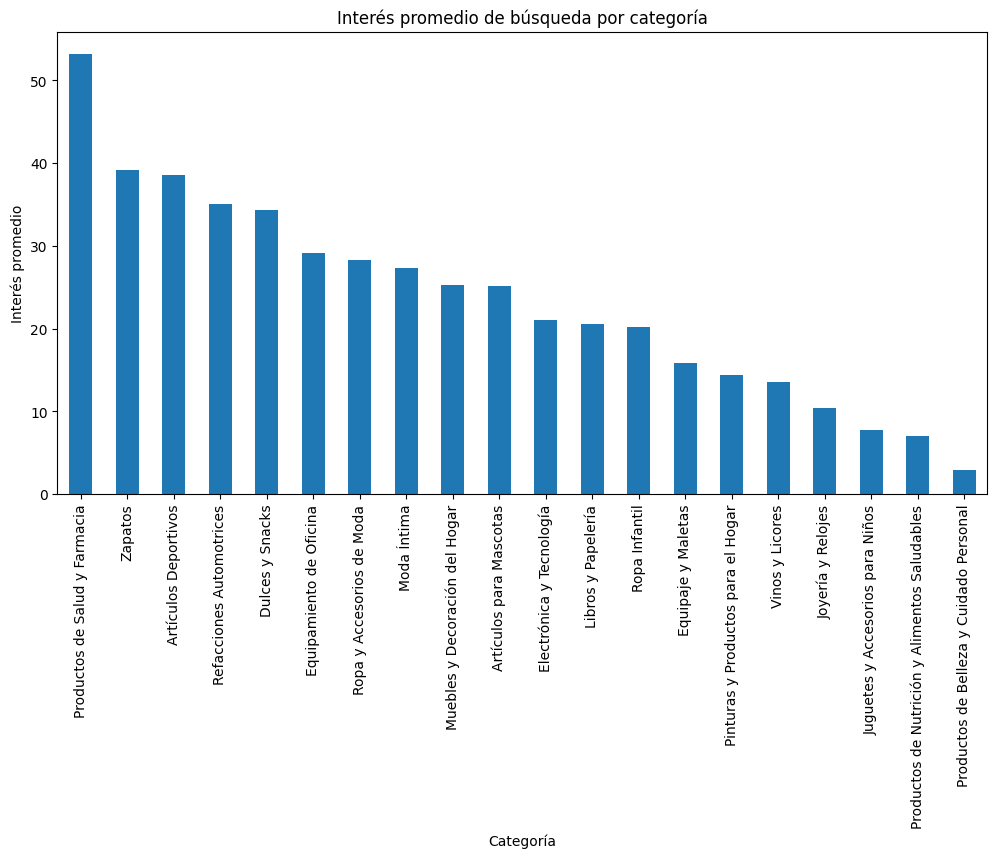

In [25]:
# Calcular el interés promedio de búsqueda para cada categoría
average_interest = all_trends_data.mean().sort_values(ascending=False)
average_interest.plot(kind='bar', figsize=(12, 6), title="Interés promedio de búsqueda por categoría")
plt.xlabel("Categoría")
plt.ylabel("Interés promedio")
plt.show()


# Análisis Temporal: Tendencias de Búsqueda por Categoría

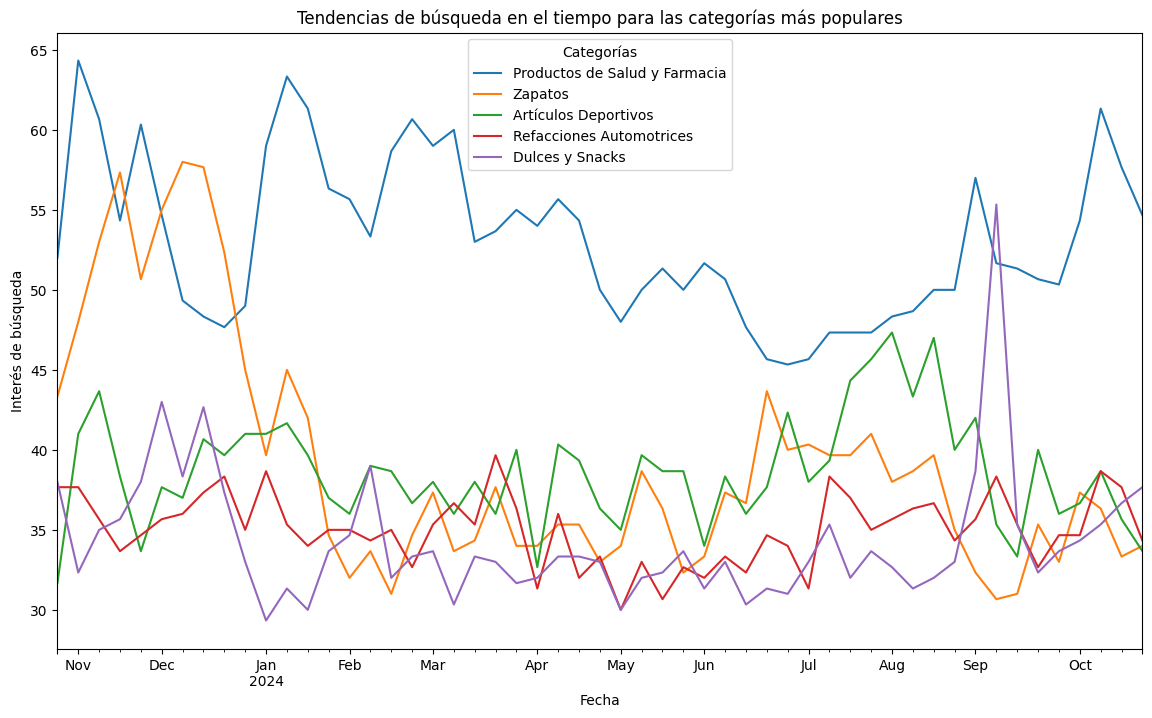

In [26]:
top_categories = average_interest.head(5).index
all_trends_data[top_categories].plot(figsize=(14, 8), title="Tendencias de búsqueda en el tiempo para las categorías más populares")
plt.xlabel("Fecha")
plt.ylabel("Interés de búsqueda")
plt.legend(title="Categorías")
plt.show()


# Detección de Estacionalidad en las Búsquedas

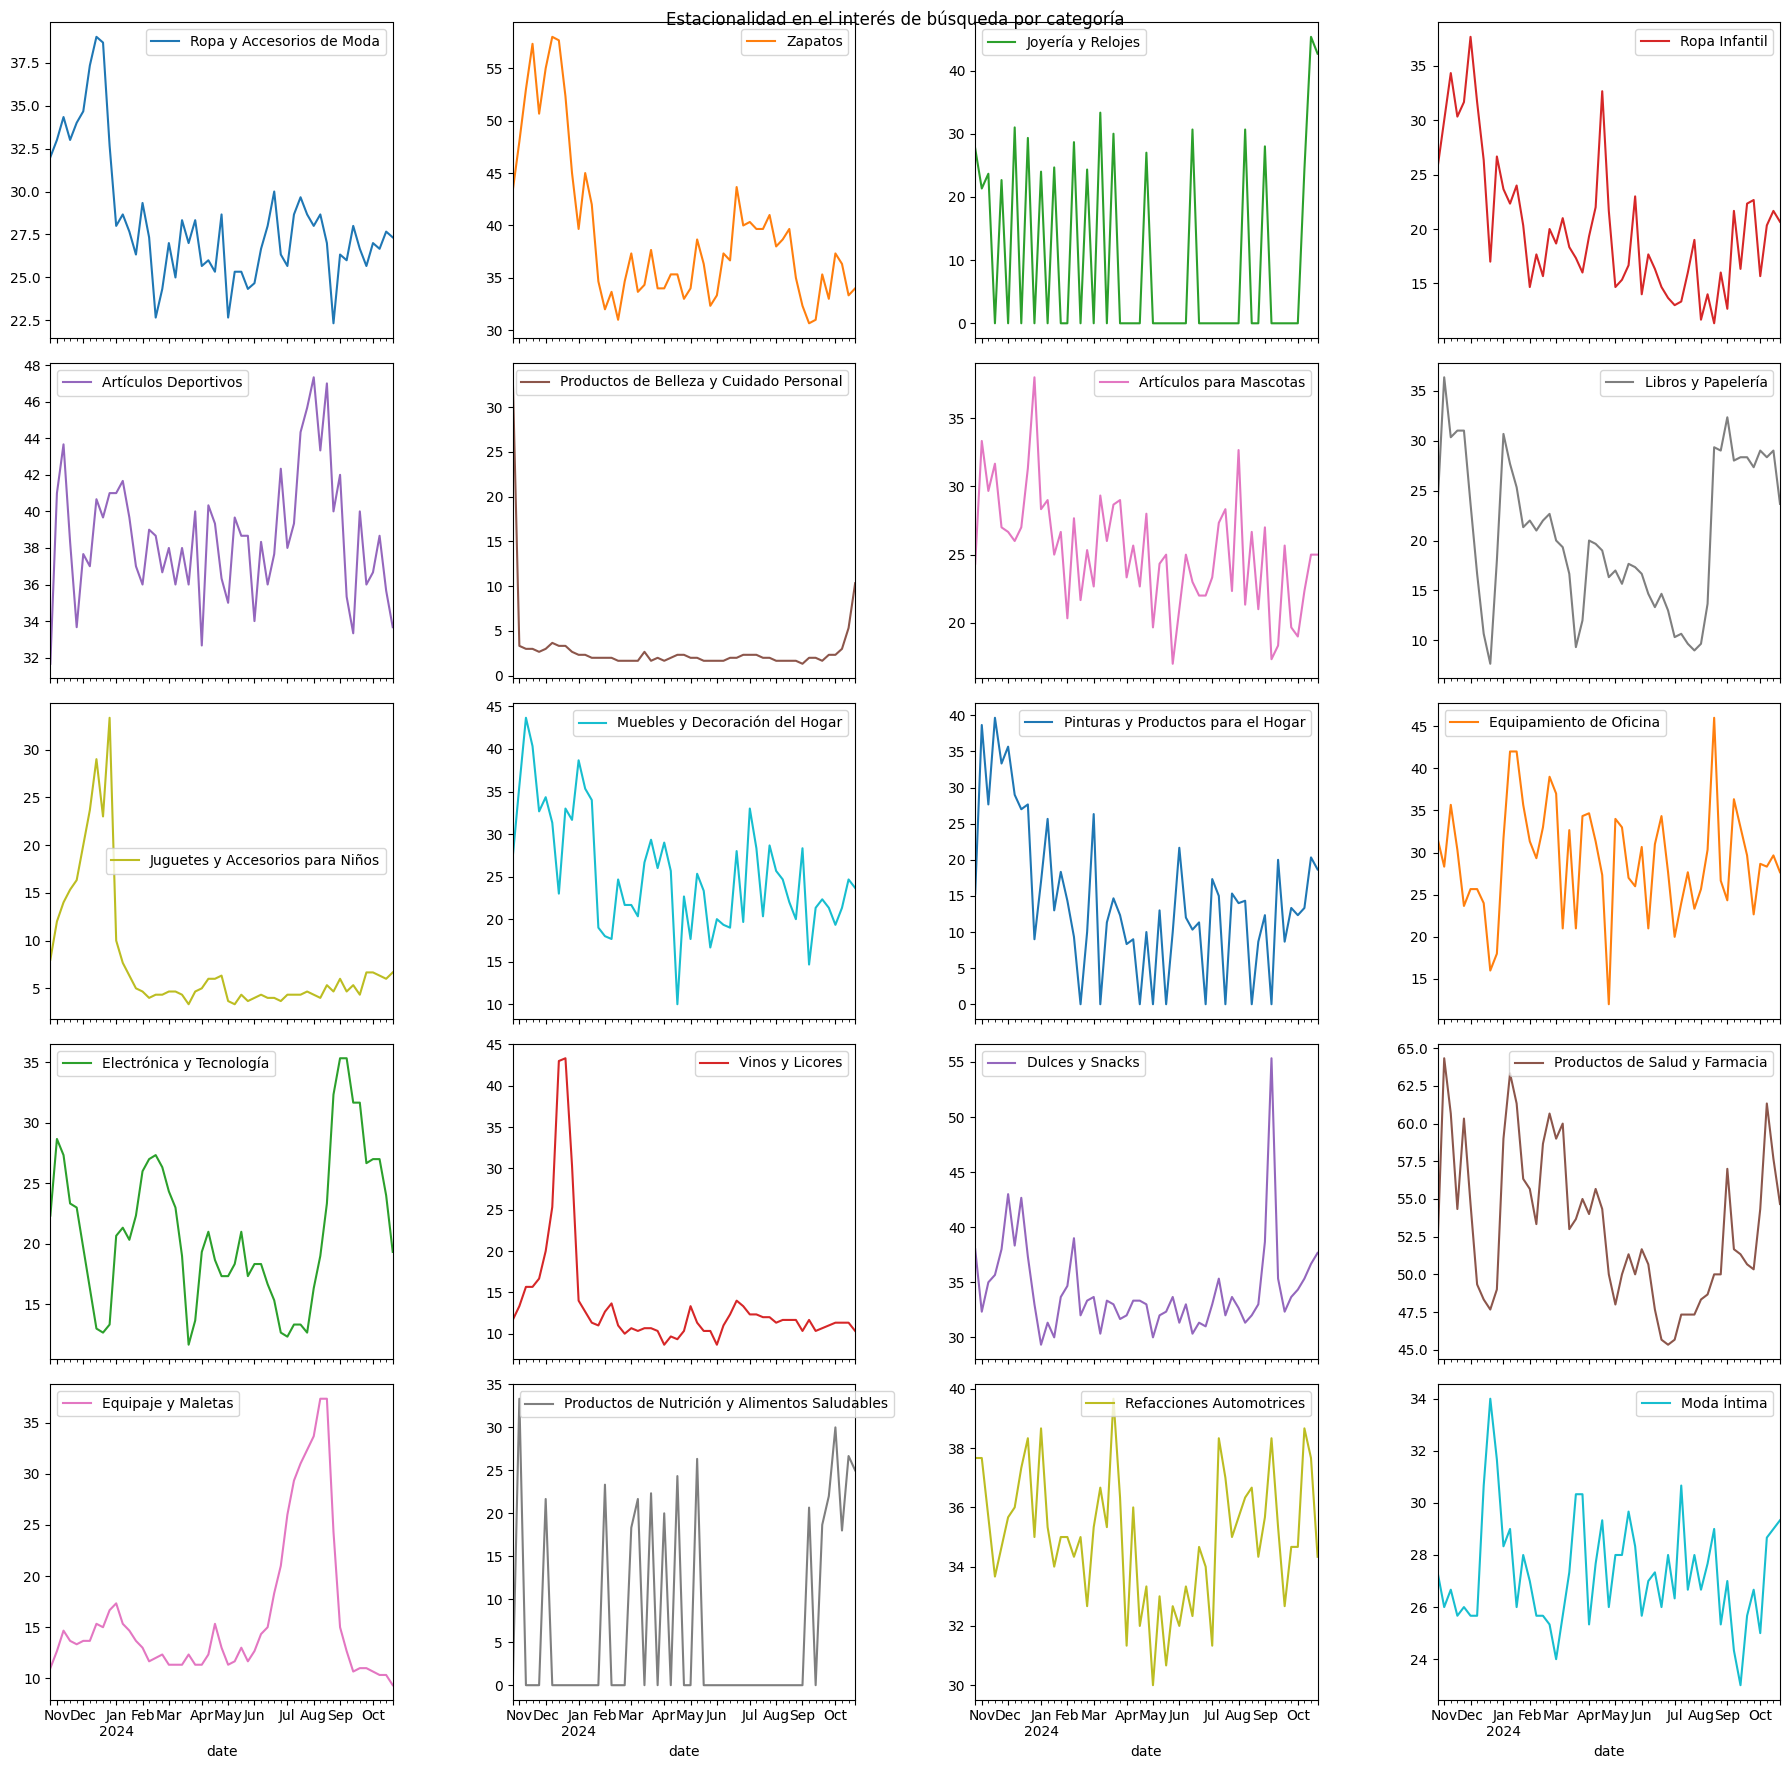

In [27]:
import matplotlib.pyplot as plt

# Graficar las tendencias a lo largo del tiempo para todas las categorías para detectar estacionalidad
all_trends_data.plot(subplots=True, layout=(5, 4), figsize=(18, 18), title="Estacionalidad en el interés de búsqueda por categoría")
plt.tight_layout()
plt.show()


# Comparación entre Categorías en Meses Clave

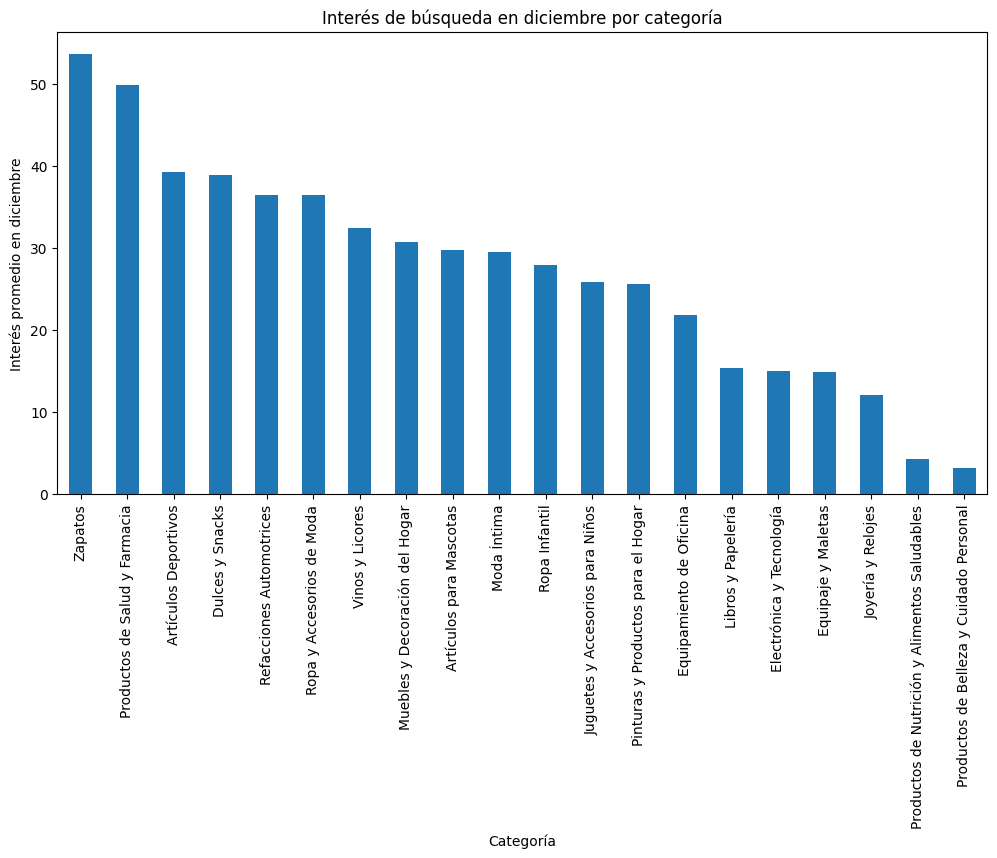

In [28]:
# Filtrar datos para diciembre de cada año
december_data = all_trends_data[all_trends_data.index.month == 12]

# Calcular el promedio de interés de búsqueda en diciembre para cada categoría
december_interest = december_data.mean().sort_values(ascending=False)
december_interest.plot(kind='bar', figsize=(12, 6), title="Interés de búsqueda en diciembre por categoría")
plt.xlabel("Categoría")
plt.ylabel("Interés promedio en diciembre")
plt.show()


# Clustering de Categorías Basado en Tendencias de Búsqueda

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Estandarizar los datos antes del clustering
scaled_data = scaler.fit_transform(all_trends_data.T)

# Aplicar K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

clustered_categories = pd.DataFrame({"Categoría": all_trends_data.columns, "Clúster": clusters})
print(clustered_categories.sort_values("Clúster"))


                                        Categoría  Clúster
9                  Muebles y Decoración del Hogar        0
16                             Equipaje y Maletas        0
3                                   Ropa Infantil        0
13                                Vinos y Licores        0
6                         Artículos para Mascotas        0
7                              Libros y Papelería        0
12                       Electrónica y Tecnología        0
10             Pinturas y Productos para el Hogar        0
15                  Productos de Salud y Farmacia        1
14                                Dulces y Snacks        1
11                        Equipamiento de Oficina        1
0                       Ropa y Accesorios de Moda        1
4                            Artículos Deportivos        1
1                                         Zapatos        1
18                       Refacciones Automotrices        1
19                                    Moda Íntima       

# Identificar Picos de Popularidad en Cada Categoría

In [31]:
# Encontrar la fecha del pico de búsqueda para cada categoría
peak_dates = all_trends_data.idxmax()
peak_values = all_trends_data.max()

# Crear un DataFrame con los picos y las fechas
peaks_df = pd.DataFrame({"Fecha Pico": peak_dates, "Valor Pico": peak_values})
peaks_df.sort_values(by="Valor Pico", ascending=False)


,Fecha Pico,Valor Pico
Productos de Salud y Farmacia,2023-11-05,64.333333
Zapatos,2023-12-10,58.000000
Dulces y Snacks,2024-09-08,55.333333
Artículos Deportivos,2024-08-04,47.333333
Equipamiento de Oficina,2024-08-18,46.000000
Joyería y Relojes,2024-10-20,45.333333
Muebles y Decoración del Hogar,2023-11-12,43.666667
Vinos y Licores,2023-12-24,43.333333
Pinturas y Productos para el Hogar,2023-11-19,39.666667
Refacciones Automotrices,2024-03-24,39.666667


### Clúster 0
- **Categorías**: Muebles y Decoración del Hogar, Equipaje y Maletas, Ropa Infantil, Vinos y Licores, Artículos para Mascotas, Libros y Papelería, Electrónica y Tecnología, Pinturas y Productos para el Hogar.
- **Patrón General**: Estas categorías parecen tener un interés de búsqueda constante y estable. Pueden ser productos de demanda sostenida a lo largo del año, sin fuertes estacionalidades o picos abruptos.
- **Estrategia**: Para estas categorías, es posible que una estrategia de promoción continua sea efectiva, dado que el interés de búsqueda es regular. Además, se pueden enfocar en optimizar la disponibilidad y visibilidad en la plataforma de e-commerce, ya que es probable que siempre haya cierta demanda.

### Clúster 1
- **Categorías**: Productos de Salud y Farmacia, Dulces y Snacks, Equipamiento de Oficina, Ropa y Accesorios de Moda, Artículos Deportivos, Zapatos, Refacciones Automotrices, Moda Íntima.
- **Patrón General**: Este grupo parece representar productos con una demanda moderada y posiblemente picos de interés en ciertos periodos (por ejemplo, artículos de moda en fechas de promociones, o artículos de oficina al inicio del año escolar).
- **Estrategia**: Para estas categorías, es recomendable diseñar campañas estacionales o enfocarse en períodos específicos en los que el interés puede aumentar. Aprovechar eventos de alto tráfico como el Buen Fin, Navidad o regreso a clases puede maximizar el retorno de inversión en marketing para estas categorías.

### Clúster 2
- **Categorías**: Joyería y Relojes.
- **Patrón General**: La categoría de Joyería y Relojes se agrupa sola, lo cual sugiere que su patrón de interés de búsqueda es diferente al de otras categorías. Puede que tenga picos específicos, como en el caso de fechas relacionadas con celebraciones (Día de San Valentín, Día de las Madres).
- **Estrategia**: Enfocar los esfuerzos en campañas específicas en fechas clave puede ser más efectivo para esta categoría. Promociones durante las temporadas de regalos pueden captar la mayor parte del interés y aumentar las ventas.

### Clúster 3
- **Categorías**: Juguetes y Accesorios para Niños, Productos de Belleza y Cuidado Personal, Productos de Nutrición y Alimentos Saludables.
- **Patrón General**: Estas categorías pueden mostrar estacionalidad significativa, por ejemplo, en la temporada de fin de año para juguetes, o en momentos de conciencia de salud (como inicios de año para productos de nutrición).
- **Estrategia**: Este clúster se beneficia de una estrategia de marketing centrada en la estacionalidad. Para los juguetes, las promociones en diciembre son clave, mientras que los productos de salud pueden promocionarse al inicio del año o durante campañas de bienestar. Los productos de belleza pueden tener picos en temporadas de fiestas y eventos.


# Correlación de categorías

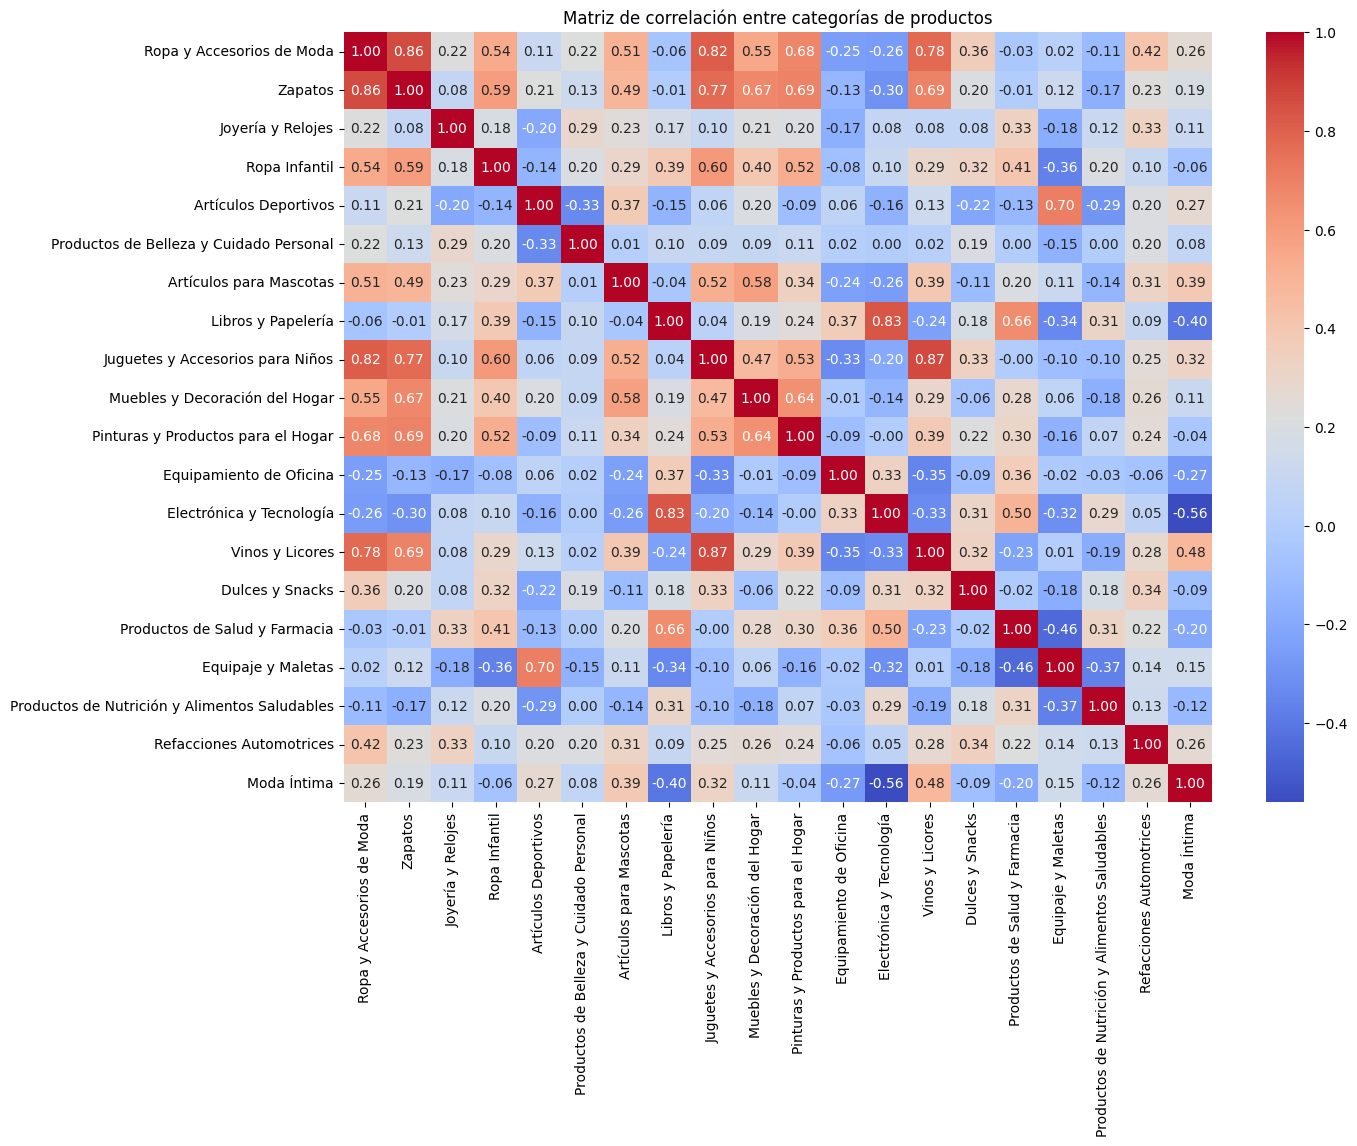

In [33]:
# Calcular la matriz de correlación
correlation_matrix = all_trends_data.corr()

# Mostrar un mapa de calor de la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre categorías de productos")
plt.show()


### Categorías con Alta Correlación Positiva:

- **Ropa y Accesorios de Moda y Zapatos**: Con una correlación de 0.86, es probable que los usuarios busquen ambas categorías de manera conjunta, lo que sugiere que estas categorías podrían beneficiarse de estrategias de marketing cruzado.
- **Juguetes y Accesorios para Niños y Ropa Infantil**: Con una correlación de 0.77, esto indica que los intereses en juguetes y ropa infantil suelen aumentar o disminuir en conjunto, especialmente en épocas de regalos como Navidad.
- **Pinturas y Productos para el Hogar con Muebles y Decoración del Hogar**: La correlación de 0.69 sugiere que quienes buscan productos de pintura también suelen mostrar interés en muebles y decoración, lo cual puede ser útil para campañas de renovación del hogar.
- **Vinos y Licores y Dulces y Snacks**: Correlación de 0.69. Esto indica que las búsquedas de estos productos aumentan juntas, posiblemente para eventos o celebraciones.

### Categorías con Correlación Negativa:

- **Electrónica y Tecnología y Moda Íntima**: La correlación negativa (-0.56) sugiere que el interés en estas categorías tiende a ser inverso; cuando aumenta el interés en tecnología, disminuye en moda íntima. Esto puede indicar diferentes públicos o temporadas de búsqueda.
- **Artículos Deportivos y Moda Íntima**: Con una correlación negativa (-0.22), estos productos no suelen ser buscados juntos. Esto puede reflejar diferentes preferencias o necesidades de los usuarios en el momento de la búsqueda.

### Categorías con Baja o Nula Correlación:

- **Artículos para Mascotas y muchas otras categorías**: En general, esta categoría tiene baja correlación con otras, lo que indica que el interés de búsqueda en productos para mascotas es relativamente independiente y podría necesitar estrategias de marketing específicas.

### Estrategias Basadas en la Correlación

- **Marketing Cruzado para Categorías Altamente Correlacionadas**: Por ejemplo, en promociones de ropa y accesorios de moda, también se pueden ofrecer descuentos o recomendaciones para zapatos, dado que ambas categorías tienen una alta correlación de búsqueda.
- **Estrategias Estacionales para Categorías con Correlación Moderada o Alta en Temporadas Específicas**: La alta correlación entre juguetes, ropa infantil, y dulces sugiere que estas categorías pueden beneficiarse de promociones estacionales, especialmente en periodos de compras para niños.
- **Promociones Independientes para Categorías con Baja o Nula Correlación**: Productos como artículos para mascotas o moda íntima, que tienen baja correlación con otros productos, podrían necesitar estrategias de marketing separadas, sin depender de otras categorías para maximizar su impacto.


# Conclusiones

# Análisis de Interés de Búsqueda por Categoría

## 1. Interés Promedio de Búsqueda por Categoría

El gráfico de interés promedio de búsqueda ofrece una visión general de las categorías de productos con mayor demanda en términos de búsqueda. Este análisis es fundamental para entender qué productos tienen una demanda alta constante y cuáles tienen una demanda baja. A continuación, se presentan algunos insights:

- **Productos de Salud y Farmacia** es la categoría más buscada, con un promedio de búsqueda superior a todas las demás. Esto sugiere que la demanda de productos de salud es alta y estable. Es probable que esta categoría esté menos influenciada por la estacionalidad y más por la necesidad constante, lo que indica que las campañas de marketing deberían enfocarse en disponibilidad continua y visibilidad a lo largo del año.
- **Zapatos, Artículos Deportivos y Refacciones Automotrices** también son categorías de alta demanda. Los zapatos y artículos deportivos pueden beneficiarse de campañas de temporada, especialmente en invierno y verano, cuando las personas cambian su vestuario o inician rutinas deportivas. Las refacciones automotrices podrían estar ligadas a temporadas de vacaciones y al mantenimiento preventivo.
- **Dulces y Snacks, Equipamiento de Oficina y Ropa y Accesorios de Moda** presentan un interés moderado. Estas categorías se pueden asociar con fechas específicas como el regreso a clases, el Buen Fin, y las festividades de fin de año.
- Las categorías con **interés bajo**, como Joyería y Relojes, Productos de Nutrición y Alimentos Saludables, y Productos de Belleza y Cuidado Personal, tienen una demanda más específica. Su estacionalidad puede estar relacionada con eventos particulares, como días de regalos o celebraciones de bienestar (Día de San Valentín, campañas de salud).

**Conclusión:** Este gráfico sugiere que las campañas de marketing deben adaptarse a la demanda promedio de cada categoría. Las categorías de alta demanda, como Salud y Farmacia, deben estar siempre presentes y ser promovidas constantemente. Las categorías de demanda media y baja requieren campañas específicas en momentos clave del año.

## 2. Tendencias de Búsqueda en el Tiempo

El análisis temporal de las cinco categorías más populares (Productos de Salud y Farmacia, Zapatos, Artículos Deportivos, Refacciones Automotrices y Dulces y Snacks) ofrece una visión de cómo varía la demanda a lo largo del año.

- **Productos de Salud y Farmacia:** Esta categoría muestra una tendencia de búsqueda sostenida con algunos picos, probablemente relacionados con el inicio del invierno y el aumento de enfermedades respiratorias. Esto indica una demanda constante, que se intensifica en ciertas temporadas.
- **Zapatos:** La categoría tiene picos significativos al final y al inicio del año. Esto puede asociarse con el Buen Fin y la Navidad, así como con el cambio de estación. Las campañas de marketing para esta categoría deberían aprovechar estos periodos.
- **Artículos Deportivos:** Esta categoría experimenta picos al inicio del año, en línea con las resoluciones de Año Nuevo, cuando muchas personas inician rutinas de ejercicio. También muestra variaciones en primavera y verano, probablemente por el aumento de actividades al aire libre.
- **Refacciones Automotrices:** Esta categoría tiene una demanda estable con algunos picos, lo que sugiere que los usuarios realizan búsquedas para mantenimiento de vehículos en momentos específicos, como antes de vacaciones o de temporadas de lluvias.
- **Dulces y Snacks:** Los picos en septiembre coinciden con celebraciones nacionales y otras festividades. También es común que esta categoría tenga un aumento en diciembre debido a las fiestas navideñas.

**Conclusión:** La demanda de estas categorías está influenciada tanto por la estacionalidad como por eventos sociales. Las estrategias de marketing deben planearse para capturar estos picos, especialmente en épocas como diciembre y enero, cuando las compras de regalos y las resoluciones de Año Nuevo son comunes.

## 3. Estacionalidad en el Interés de Búsqueda

Este análisis desglosa la estacionalidad de cada categoría en subgráficos, permitiendo observar la variación en el tiempo.

- **Categorías con Alta Estacionalidad:** Algunas categorías como Joyería y Relojes, Vinos y Licores, y Dulces y Snacks muestran una alta estacionalidad, con picos claros en ciertas fechas. La joyería y los relojes aumentan en momentos como el Día de San Valentín y Navidad, mientras que los vinos y licores, junto con los snacks, se consumen en mayor cantidad durante las festividades.
- **Categorías con Baja Estacionalidad:** Productos de Belleza y Cuidado Personal y Artículos para Mascotas presentan una demanda estable a lo largo del año. Esto sugiere que estas categorías no están sujetas a la estacionalidad y, por lo tanto, las campañas pueden enfocarse en la constancia y en la generación de lealtad.
- **Categorías con Picos en Periodos Específicos:** Libros y Papelería tienden a tener picos de interés en periodos de regreso a clases, y Equipamiento de Oficina muestra variaciones que pueden estar relacionadas con cambios en el entorno laboral y el regreso a la oficina.

**Conclusión:** La estacionalidad varía ampliamente entre categorías. Las estrategias de marketing deberían enfocarse en capturar la demanda en picos estacionales para categorías como joyería, bebidas y dulces, mientras que para categorías de baja estacionalidad se recomienda una presencia constante.

## 4. Interés de Búsqueda en Diciembre

En diciembre, muchas categorías experimentan un aumento en las búsquedas, lo cual es relevante para la planeación de campañas de fin de año.

- **Categorías con Mayor Demanda en Diciembre:** Zapatos, Productos de Salud y Farmacia, Artículos Deportivos y Dulces y Snacks destacan en el mes de diciembre. Esto coincide con la temporada de compras navideñas, cuando se incrementa el gasto en regalos y en preparativos para eventos festivos.
- **Refacciones Automotrices** también tiene un interés elevado en diciembre, probablemente debido a que muchas personas preparan sus vehículos para viajes largos durante las vacaciones.
- **Categorías de Moderada Demanda en Diciembre:** Ropa y Accesorios de Moda, Vinos y Licores muestran interés notable, aunque no tan alto como otras categorías. Estas son categorías clásicas para regalar o disfrutar en celebraciones, y requieren campañas específicas para capitalizar la demanda en diciembre.
- **Categorías de Baja Demanda:** Joyería y Relojes, Productos de Belleza y Cuidado Personal tienen un interés más bajo en diciembre en comparación con otras, aunque aún existe un potencial de demanda que puede aprovecharse mediante campañas centradas en regalos.

**Conclusión:** Diciembre es una época clave para la mayoría de las categorías, especialmente aquellas relacionadas con regalos y celebraciones. Las campañas de fin de año deben estar diseñadas para capturar el interés de los consumidores en esta época, aprovechando al máximo las tendencias de búsqueda en categorías como zapatos, salud y farmacia, y artículos deportivos.

## 5. Matriz de Correlación entre Categorías

La matriz de correlación entre categorías permite identificar relaciones entre diferentes productos, lo que es útil para estrategias de marketing cruzado.

- **Correlaciones Positivas Altas:**
    - **Ropa y Zapatos (0.86):** La alta correlación sugiere que los consumidores que buscan una de estas categorías suelen interesarse en la otra. Esto permite desarrollar estrategias de marketing cruzado que combinen promociones para ropa y calzado, incrementando así el ticket promedio.
    - **Muebles y Pinturas (0.69):** Esta correlación indica que los consumidores que buscan productos para el hogar también tienen interés en decorarlo, lo cual se puede aprovechar en campañas de renovación de espacios.
    - **Vinos y Licores y Dulces y Snacks (0.69):** Estas categorías están altamente correlacionadas, lo cual sugiere que los consumidores compran ambos productos para celebraciones y eventos sociales. Esto es ideal para campañas en épocas festivas.
- **Correlaciones Negativas:**
    - **Electrónica y Tecnología y Moda Íntima (-0.56):** La correlación negativa indica que los consumidores que buscan artículos de tecnología no suelen buscar moda íntima, lo cual sugiere que estas categorías están dirigidas a públicos distintos.
    - **Artículos Deportivos y Moda Íntima (-0.22):** Aunque la correlación negativa no es tan marcada, esta relación sugiere que ambas categorías son independientes, probablemente orientadas a diferentes necesidades de consumo.
- **Correlaciones Neutras o Bajas:**
    - **Artículos para Mascotas y otras categorías:** En general, los productos para mascotas muestran poca correlación con otros productos, lo cual indica que el interés en esta categoría es independiente. Esto sugiere la necesidad de estrategias de marketing específicas para esta categoría, sin depender de tendencias en otras áreas.

**Conclusión:** La matriz de correlación permite identificar oportunidades para estrategias de marketing cruzado en categorías con alta correlación positiva. Para categorías con baja correlación, se recomienda un enfoque de marketing independiente, dado que los intereses en estos productos no están relacionados.

---

## Conclusión General

Este análisis detallado de interés de búsqueda y correlación por categoría permite una planeación estratégica para maximizar el impacto de las campañas de marketing. Las principales recomendaciones incluyen:

- **Estrategias Continuas** para categorías de alta demanda promedio y baja estacionalidad, como Salud y Farmacia.
- **Campañas de Temporada** para categorías con alta estacionalidad, como Joyería, Vinos y Licores, y Artículos Deportivos.
- **Promociones de Fin de Año** para categorías de alta demanda en diciembre, especialmente Zapatos, Salud y Farmacia, y Dulces y Snacks.
- **Marketing Cruzado** en categorías con alta correlación, como Ropa y Zapatos, para aumentar el ticket promedio.
- **Enfoques Específicos** para categorías con baja correlación, como Artículos para Mascotas, donde la demanda es independiente de otras categorías.

Este enfoque integral permite diseñar campañas personalizadas que respondan a las variaciones de demanda en el tiempo, la estacionalidad, y las preferencias de los consumidores, optimizando así el retorno de inversión en marketing.
